Regression and Basic Plotting
===
---
1. Examining data
2. Regression
3. Graph - scatter plot
4. Output
---

In [3]:
cd "/Users/tino/Desktop/TA-Econometrics-II/notebooks_Stata"
pwd


/Users/tino/Desktop/TA-Econometrics-II/notebooks_Stata

/Users/tino/Desktop/TA-Econometrics-II/notebooks_Stata


In [10]:
insheet using "attend.csv", clear

(8 vars, 680 obs)


In [11]:
drop v1
describe




Contains data
  obs:           680                          
 vars:             7                          
 size:         8,840                          
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
final           byte    %8.0g                 
termgpa         float   %9.0g                 termGPA
prigpa          float   %9.0g                 priGPA
act             byte    %8.0g                 ACT
frosh           byte    

---
## 1. Examining data
* summarize(or sum) - Mean, S.D., Min, Max of each variables.
* tab var1, sum(var2) - conditional on var1, the summary statistics of var2.
* corr var1 var2 - correlation matrix of var1 and var2.
* corr var1 var2, convariance - covariance matrix of var1 and var2.
* ci means var, level(99) - 99% confidence interval.

In [14]:
summarize // observe the Mean, standard deviation of variables.


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
       final |        680    25.89118    4.709835         10         39
     termgpa |        680       2.601     .736586          0          4
      prigpa |        680    2.586775    .5447141       .857       3.93
         act |        680    22.51029    3.490768         13         32
       frosh |        680    .2323529    .4226438          0          1
-------------+---------------------------------------------------------
        soph |        680    .5764706    .4944814          0          1
      missed |        680    5.852941    5.455037          0         30


In [84]:
tab frosh, sum(final) // conditional summary.


            |          Summary of final
      frosh |        Mean   Std. Dev.       Freq.
------------+------------------------------------
          0 |    26.12069   4.8063052         522
          1 |   25.132911   4.3039079         158
------------+------------------------------------
      Total |   25.891176   4.7098348         680


In [16]:
tab soph, sum(final)


            |          Summary of final
       soph |        Mean   Std. Dev.       Freq.
------------+------------------------------------
          0 |   25.739583   4.5682851         288
          1 |   26.002551   4.8139284         392
------------+------------------------------------
      Total |   25.891176   4.7098348         680


In [18]:
corr \\ correlation Matrix

(obs=680)

             |    final  termgpa   prigpa      act    frosh     soph   missed
-------------+---------------------------------------------------------------
       final |   1.0000
     termgpa |   0.5106   1.0000
      prigpa |   0.3659   0.6532   1.0000
         act |   0.3612   0.2456   0.3538   1.0000
       frosh |  -0.0886  -0.1308  -0.3085  -0.1494   1.0000
        soph |   0.0276   0.1323   0.2411   0.1092  -0.6419   1.0000
      missed |  -0.1400  -0.5598  -0.4272   0.1564   0.0200  -0.0521   1.0000



In [20]:
corr final prigpa
corr missed termgpa


(obs=680)

             |    final   prigpa
-------------+------------------
       final |   1.0000
      prigpa |   0.3659   1.0000


(obs=680)

             |   missed  termgpa
-------------+------------------
      missed |   1.0000
     termgpa |  -0.5598   1.0000



In [19]:
corr ,covariance // covariance matrix

(obs=680)

             |    final  termgpa   prigpa      act    frosh     soph   missed
-------------+---------------------------------------------------------------
       final |  22.1825
     termgpa |   1.7714  .542559
      prigpa |  .938791   .26207  .296713
         act |  5.93927  .631605  .672682  12.1855
       frosh | -.176445 -.040711 -.071017 -.220363  .178628
        soph |  .064299  .048177   .06495  .188461 -.134142  .244512
      missed | -3.59776 -2.24924 -1.26936  2.97795  .046002 -.140431  29.7574



In [21]:
corr final missed, covariance

(obs=680)

             |    final   missed
-------------+------------------
       final |  22.1825
      missed | -3.59776  29.7574



In [25]:
ci means final, level(99) // 99% confidence interval.


    Variable |        Obs        Mean    Std. Err.       [99% Conf. Interval]
-------------+---------------------------------------------------------------
       final |        680    25.89118    .1806139        25.42463    26.35772


---
## 2. Regression
* reg dependent_var independent_vars

In [26]:
reg final missed


      Source |       SS           df       MS      Number of obs   =       680
-------------+----------------------------------   F(1, 678)       =     13.56
       Model |  295.352008         1  295.352008   Prob > F        =    0.0002
    Residual |  14766.5951       678  21.7796387   R-squared       =    0.0196
-------------+----------------------------------   Adj R-squared   =    0.0182
       Total |  15061.9471       679  22.1825435   Root MSE        =    4.6669

------------------------------------------------------------------------------
       final |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
      missed |  -.1209031   .0328317    -3.68   0.000     -.185367   -.0564391
       _cons |   26.59882   .2625929   101.29   0.000     26.08322    27.11441
------------------------------------------------------------------------------


In [27]:
reg final termgpa prigpa act frosh soph missed


      Source |       SS           df       MS      Number of obs   =       680
-------------+----------------------------------   F(6, 673)       =     56.13
       Model |  5023.20088         6  837.200146   Prob > F        =    0.0000
    Residual |  10038.7462       673  14.9164133   R-squared       =    0.3335
-------------+----------------------------------   Adj R-squared   =    0.3276
       Total |  15061.9471       679  22.1825435   Root MSE        =    3.8622

------------------------------------------------------------------------------
       final |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
     termgpa |   3.381864   .2978046    11.36   0.000     2.797126    3.966602
      prigpa |   .0292388   .3985607     0.07   0.942    -.7533333    .8118108
         act |   .2890092   .0497349     5.81   0.000     .1913549    .3866634
       frosh |  -.5218307   .4714825    -1.11   0.

## 3. Graph 
* twoway scatter var1 var2
* twoway scatter var1 var2 || lfit var1 var2
* [Reference in Problem Set 1](https://www.stata.com/support/faqs/graphics/gph/stata-graphs/)

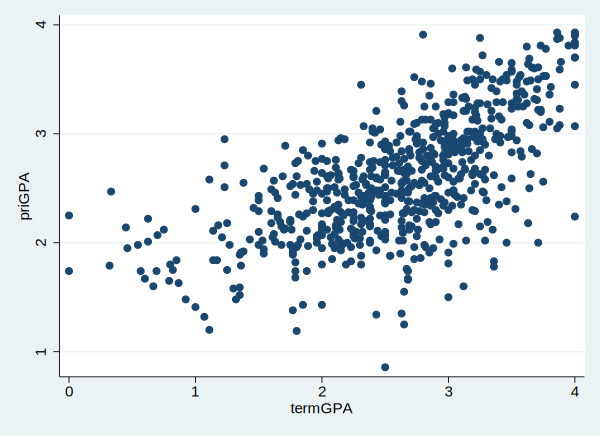

In [32]:
twoway scatter prigpa termgpa

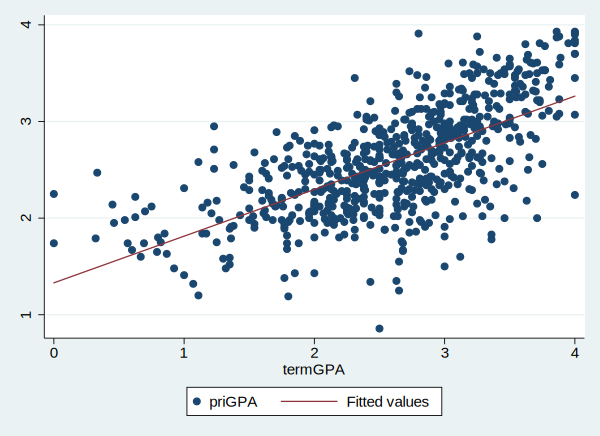

In [33]:
twoway scatter prigpa termgpa || lfit prigpa termgpa // scatter plot with fitted line

## 4. Output
* eststo (estimates store): reg dependent_var independent_vars
* esttab, options
    * esttab, wide (or compress)
    * esttab, p ar2
    * esttab, b(a3) p(4) ar2(5)
    * esttab, esttab, star(+ 0.10 * 0.05)
    * esttab, title(reg table) mti("x" "y" "z")
* esttab using example.tex, options

\\documentclass\{article\}  
\begin\{document\}  
**latex code**  
\end\{document\}

* estpost summarize
* esttab, cell("mean sd min max") label

In [34]:
eststo: reg final prigpa // store the estimates "reg final prigpa" as est1


      Source |       SS           df       MS      Number of obs   =       680
-------------+----------------------------------   F(1, 678)       =    104.82
       Model |  2016.83679         1  2016.83679   Prob > F        =    0.0000
    Residual |  13045.1103       678  19.2405756   R-squared       =    0.1339
-------------+----------------------------------   Adj R-squared   =    0.1326
       Total |  15061.9471       679  22.1825435   Root MSE        =    4.3864

------------------------------------------------------------------------------
       final |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
      prigpa |   3.163967   .3090335    10.24   0.000     2.557189    3.770744
       _cons |   17.70671    .816906    21.68   0.000     16.10274    19.31068
------------------------------------------------------------------------------
(est1 stored)


In [35]:
eststo: reg final missed // store the estimates "reg final missed" as est2


      Source |       SS           df       MS      Number of obs   =       680
-------------+----------------------------------   F(1, 678)       =     13.56
       Model |  295.352008         1  295.352008   Prob > F        =    0.0002
    Residual |  14766.5951       678  21.7796387   R-squared       =    0.0196
-------------+----------------------------------   Adj R-squared   =    0.0182
       Total |  15061.9471       679  22.1825435   Root MSE        =    4.6669

------------------------------------------------------------------------------
       final |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
      missed |  -.1209031   .0328317    -3.68   0.000     -.185367   -.0564391
       _cons |   26.59882   .2625929   101.29   0.000     26.08322    27.11441
------------------------------------------------------------------------------
(est2 stored)


In [36]:
esttab // display the est1 and est2 (default in brackets are t score)


--------------------------------------------
                      (1)             (2)   
                    final           final   
--------------------------------------------
prigpa              3.164***                
                  (10.24)                   

missed                             -0.121***
                                  (-3.68)   

_cons               17.71***        26.60***
                  (21.68)        (101.29)   
--------------------------------------------
N                     680             680   
--------------------------------------------
t statistics in parentheses
* p<0.05, ** p<0.01, *** p<0.001


In [51]:
esttab, compress 


------------------------------------
                 (1)          (2)   
               final        final   
------------------------------------
prigpa         3.164***             
             (10.24)                

missed                     -0.121***
                          (-3.68)   

_cons          17.71***     26.60***
             (21.68)     (101.29)   
------------------------------------
N                680          680   
------------------------------------
t statistics in parentheses
* p<0.05, ** p<0.01, *** p<0.001


In [52]:
esttab, wide


----------------------------------------------------------------------
                      (1)                          (2)                
                    final                        final                
----------------------------------------------------------------------
prigpa              3.164***      (10.24)                             
missed                                          -0.121***      (-3.68)
_cons               17.71***      (21.68)        26.60***     (101.29)
----------------------------------------------------------------------
N                     680                          680                
----------------------------------------------------------------------
t statistics in parentheses
* p<0.05, ** p<0.01, *** p<0.001


In [38]:
esttab, p ar2 // replace the t score in brackets to p value


--------------------------------------------
                      (1)             (2)   
                    final           final   
--------------------------------------------
prigpa              3.164***                
                  (0.000)                   

missed                             -0.121***
                                  (0.000)   

_cons               17.71***        26.60***
                  (0.000)         (0.000)   
--------------------------------------------
N                     680             680   
adj. R-sq           0.133           0.018   
--------------------------------------------
p-values in parentheses
* p<0.05, ** p<0.01, *** p<0.001


In [40]:
esttab, b(a2) p(4) ar2(5) // change the digit display


--------------------------------------------
                      (1)             (2)   
                    final           final   
--------------------------------------------
prigpa               3.16***                
                 (0.0000)                   

missed                              -0.12***
                                 (0.0002)   

_cons                17.7***         26.6***
                 (0.0000)        (0.0000)   
--------------------------------------------
N                     680             680   
adj. R-sq         0.13263         0.01816   
--------------------------------------------
p-values in parentheses
* p<0.05, ** p<0.01, *** p<0.001


In [53]:
esttab, star(+ 0.001 *+ 0.0001) // change the significant level


------------------------------------------
                      (1)            (2)  
                    final          final  
------------------------------------------
prigpa              3.164*+               
                  (10.24)                 

missed                            -0.121+ 
                                 (-3.68)  

_cons               17.71*+        26.60*+
                  (21.68)       (101.29)  
------------------------------------------
N                     680            680  
------------------------------------------
t statistics in parentheses
+ p<0.001, *+ p<0.0001


In [60]:
esttab, se title(Regression Table) mti("Final priGPA" "Final missed")


Regression Table
--------------------------------------------
                      (1)             (2)   
             Final priGPA    Final missed   
--------------------------------------------
prigpa              3.164***                
                  (0.309)                   

missed                             -0.121***
                                 (0.0328)   

_cons               17.71***        26.60***
                  (0.817)         (0.263)   
--------------------------------------------
N                     680             680   
--------------------------------------------
Standard errors in parentheses
* p<0.05, ** p<0.01, *** p<0.001


In [62]:
esttab using ta_example.tex, se title(Regression Table) mti("Final priGPA" "Final missed") label replace
// save the regression table as tex file
// we use RStudio to open the tex file

// \documentclass{article}  
// \begin{document}  
// **tex code**  
// \end{document}

(output written to ta_example.tex)


![Stata_output1](img/stata_output1.png)

![Stata_output2](img/stata_output2.png)

![Stata_output3](img/stata_output3.png)

In [72]:
eststo clear // clear all stored estimates

In [74]:
estpost summarize // make summary tabel avaiable for esttab


             |  e(count)   e(sum_w)    e(mean)     e(Var)      e(sd)     e(min)     e(max)     e(sum) 
-------------+----------------------------------------------------------------------------------------
       final |       680        680   25.89118   22.18254   4.709835         10         39      17606 
     termgpa |       680        680      2.601    .542559    .736586          0          4    1768.68 
      prigpa |       680        680   2.586775   .2967134   .5447141       .857       3.93   1759.007 
         act |       680        680   22.51029   12.18546   3.490768         13         32      15307 
       frosh |       680        680   .2323529   .1786277   .4226438          0          1        158 
        soph |       680        680   .5764706   .2445118   .4944814          0          1        392 
      missed |       680        680   5.852941   29.75743   5.455037          0         30       3980 


In [80]:
esttab, cell("mean sd min max") label // display the mean and standard deviation in estpost


------------------------------------------------------------------------
                              (1)                                       
                                                                        
                             mean           sd          min          max
------------------------------------------------------------------------
final                    25.89118     4.709835           10           39
termGPA                     2.601      .736586            0            4
priGPA                   2.586775     .5447141         .857         3.93
ACT                      22.51029     3.490768           13           32
frosh                    .2323529     .4226438            0            1
soph                     .5764706     .4944814            0            1
missed                   5.852941     5.455037            0           30
------------------------------------------------------------------------
Observations                  680                 

In [82]:
esttab using ta_descrpstat.tex, cell("mean sd min max") label 
// the steps of exporting descriptive table is the same as regression table

(output written to ta_descrpstat.tex)


![Stata_output4](img/stata_output4.png)

![Stata_output4](img/stata_output4.png)